# Lead Scoring Assignment

### 1. Reading and understanding the data 

###### Importing the necessary libraries and understanding the structure of data

In [177]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [178]:
leads = pd.read_csv('Leads.csv')

In [179]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [180]:
leads.shape

(9240, 37)

In [181]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### 2. Cleaning the data

In [182]:
print(leads['Lead Origin'].isnull().sum())
print(leads['Page Views Per Visit'].isnull().sum())
print(leads['Country'].isnull().sum())
print(leads['City'].isnull().sum())

0
137
2461
1420


In [183]:
leads['Page Views Per Visit']=leads['Page Views Per Visit'].fillna(0)
leads=leads.replace('Select',np.nan)

In [184]:
#calculating percent of null values in columns:
(leads.isnull().sum()/9240)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [185]:
# Dropping columns with more than 40% null values:
leads1 = leads.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index',
                    'Asymmetrique Activity Index','Lead Profile','Lead Quality','How did you hear about X Education'],axis=1)

In [186]:
leads1['Country']= leads1['Country'].fillna('Unknown')
leads1['City']=leads1['City'].fillna('Unknown')
leads1['Specialization']=leads1['Specialization'].fillna('Unknown')
leads1['What is your current occupation']=leads1['What is your current occupation'].fillna('Unknown')
leads1['Tags']=leads1['Tags'].fillna('Unknown')
leads1['TotalVisits']=leads1['TotalVisits'].fillna(0)
leads1['Last Activity']=leads1['Last Activity'].fillna('Unknown')
leads1['Lead Source']=leads1['Lead Source'].fillna('Unknown')
leads1['What matters most to you in choosing a course']=leads1['What matters most to you in choosing a course'].fillna('Unknown')

In [187]:
#calculating percent of null values in columns:
(leads1.isnull().sum()/9240)*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

### 3. Performing Visualizaton on the clean data

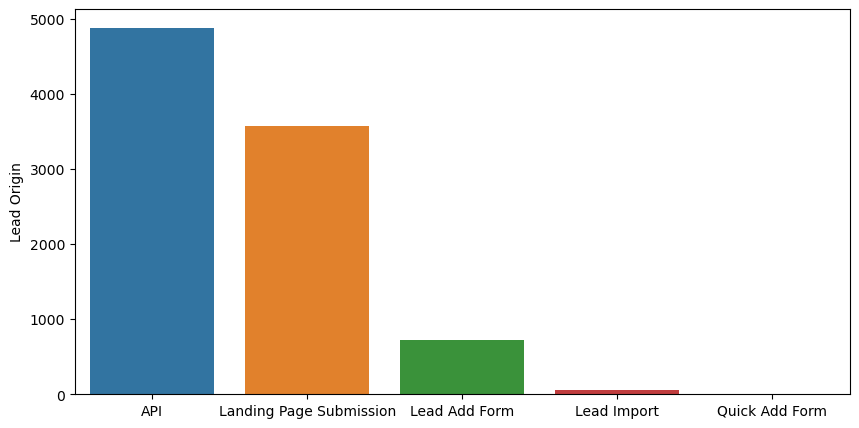

In [188]:
plt.figure(figsize=[10,5])
sns.barplot(data=leads1,x=leads1['Lead Origin'].unique(),y=leads1['Lead Origin'].value_counts())
plt.show()

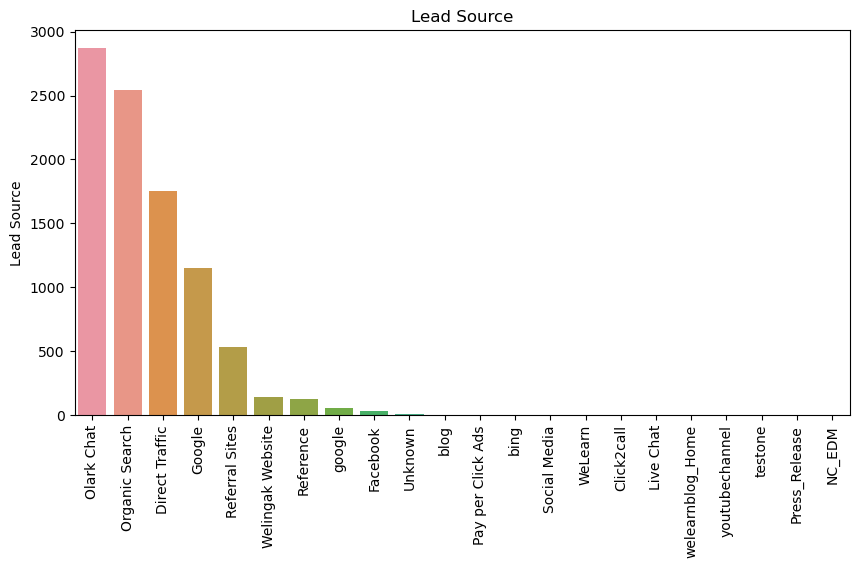

In [189]:
plt.figure(figsize=[10,5])
sns.barplot(data=leads1,x=leads1['Lead Source'].unique(),
            y=leads1['Lead Source'].value_counts()).tick_params(axis='x',rotation=90)
plt.title('Lead Source')
plt.show()

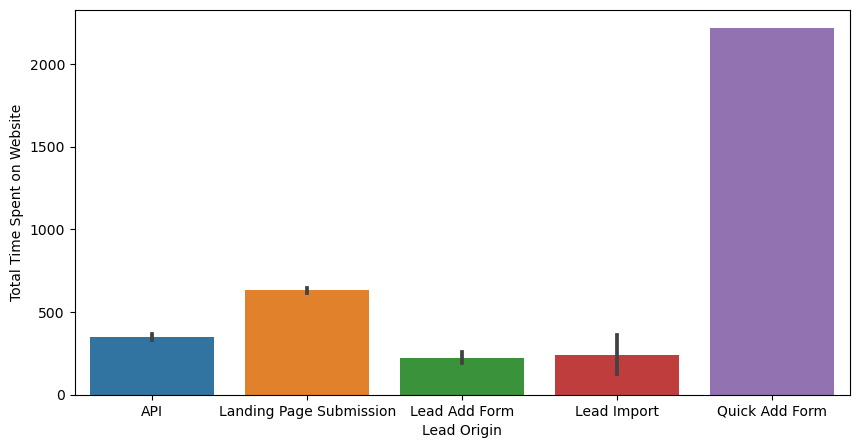

In [190]:
plt.figure(figsize=[10,5])
sns.barplot(data=leads,x='Lead Origin',y='Total Time Spent on Website')
plt.show()

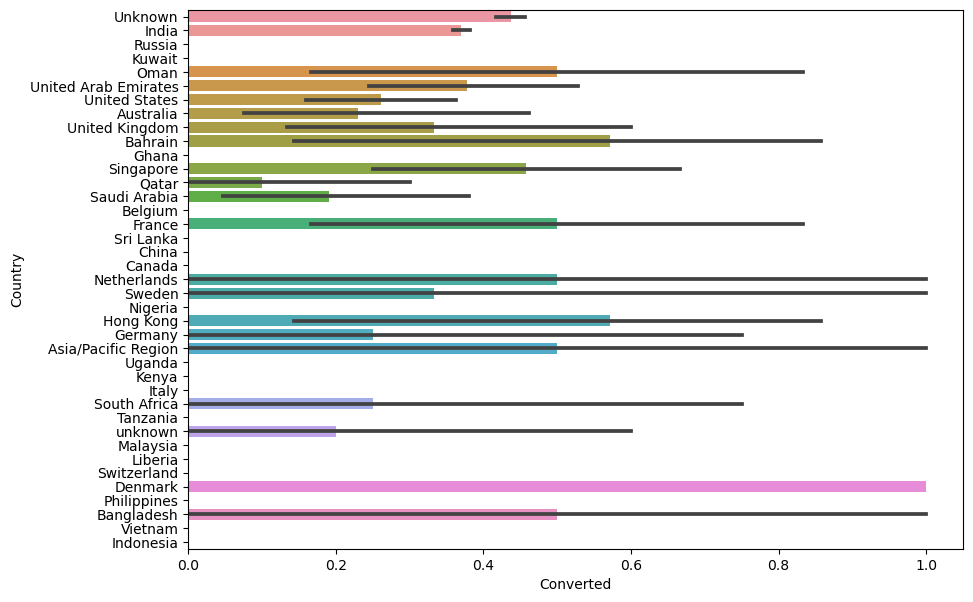

In [191]:
plt.figure(figsize=[10,7])
sns.barplot(data=leads,x=leads1['Converted'],y=leads1['Country'])
plt.show()

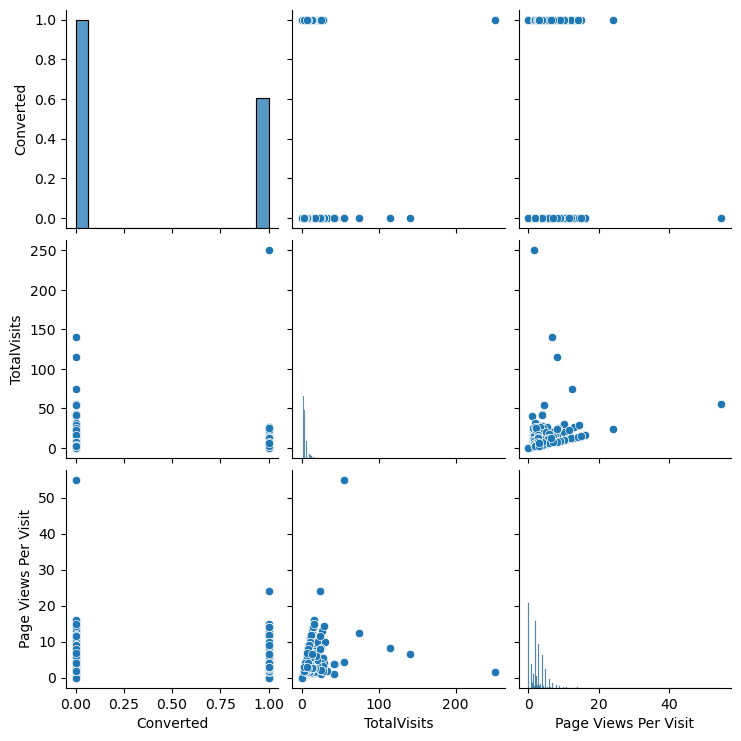

In [192]:
sns.pairplot(leads1[['Converted','TotalVisits','Page Views Per Visit']])
plt.show()

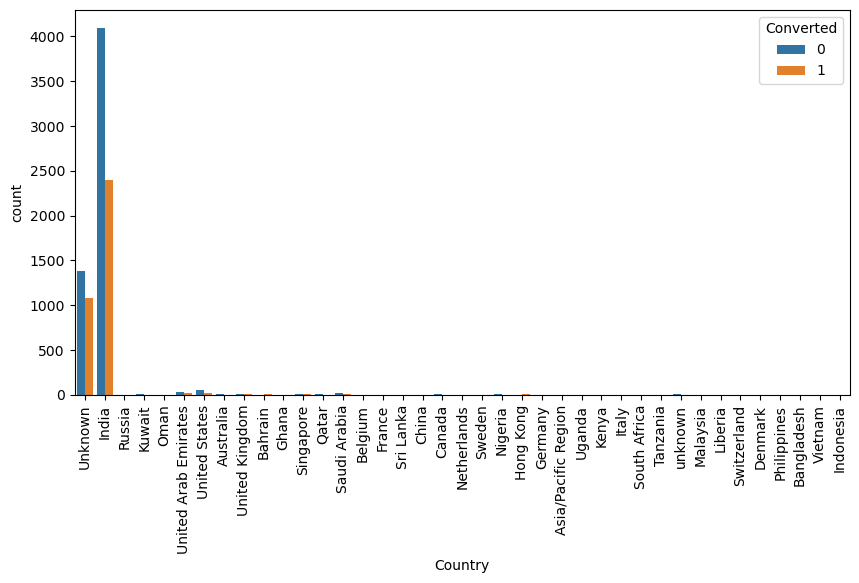

In [193]:
plt.figure(figsize=[10,5])
sns.countplot(x='Country', hue='Converted', data= leads1).tick_params(axis='x', rotation = 90)
plt.show()

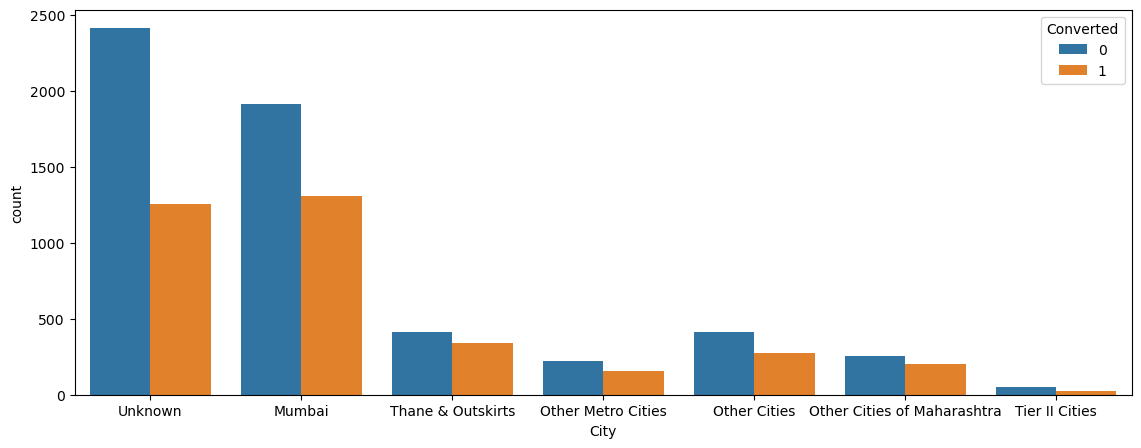

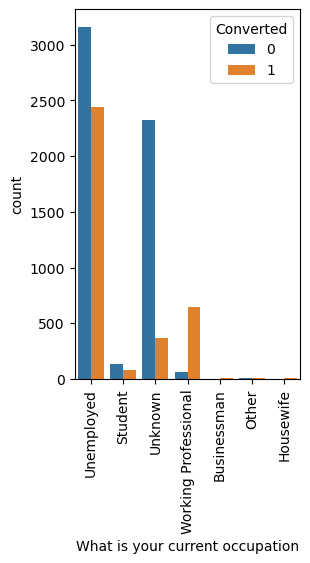

In [194]:
plt.figure(figsize=[30,5])

plt.subplot(1,2,1)
sns.countplot(x='City',hue='Converted',data=leads1)
plt.show()

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation',hue='Converted',data=leads1).tick_params(axis='x',rotation=90)
plt.show()

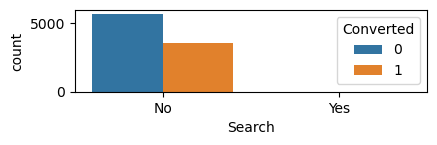

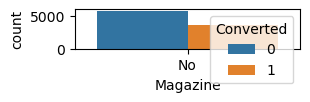

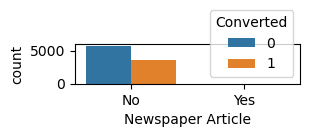

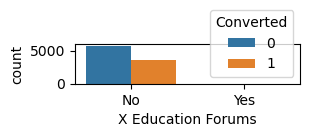

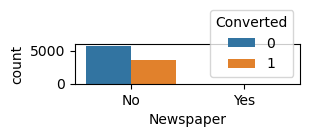

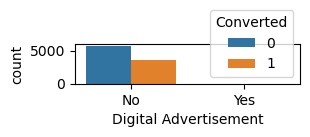

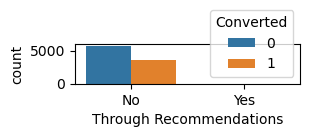

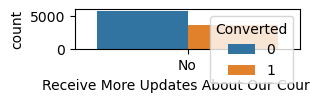

In [195]:
plt.figure(figsize=[10,10])

plt.subplot(821)
sns.countplot(x='Search',hue='Converted',data=leads1)
plt.show()

plt.subplot(822)
sns.countplot(x='Magazine',hue='Converted',data=leads1)
plt.show()

plt.subplot(823)
sns.countplot(x='Newspaper Article',hue='Converted',data=leads1)
plt.show()

plt.subplot(824)
sns.countplot(x='X Education Forums',hue='Converted',data=leads1)
plt.show()

plt.subplot(825)
sns.countplot(x='Newspaper',hue='Converted',data=leads1)
plt.show()

plt.subplot(826)
sns.countplot(x='Digital Advertisement',hue='Converted',data=leads1)
plt.show()

plt.subplot(827)
sns.countplot(x='Through Recommendations',hue='Converted',data=leads1)
plt.show()

plt.subplot(828)
sns.countplot(x='Receive More Updates About Our Courses',hue='Converted',data=leads1)
plt.show()

### 4. Getting Dummy Variables

In [196]:
leads2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Converted                                      9240 non-null   int64  
 3   TotalVisits                                    9240 non-null   float64
 4   Total Time Spent on Website                    9240 non-null   int64  
 5   Page Views Per Visit                           9240 non-null   float64
 6   Last Activity                                  9240 non-null   object 
 7   Country                                        9240 non-null   object 
 8   Specialization                                 9240 non-null   object 
 9   What is your current occupation                9240 

In [197]:
leads2= leads1.drop(['Prospect ID','Lead Number','Do Not Email','Do Not Call',
                    'I agree to pay the amount through cheque','Receive More Updates About Our Courses', 'Tags',
                   'Update me on Supply Chain Content', 'Get updates on DM Content'],axis=1)
leads2.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,...,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unknown,Unknown,Unemployed,...,No,No,No,No,No,No,No,Unknown,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,...,No,No,No,No,No,No,No,Unknown,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,...,No,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,...,No,No,No,No,No,No,No,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,...,No,No,No,No,No,No,No,Mumbai,No,Modified


In [198]:
leads2.loc[:,leads2.dtypes=='object'].columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [199]:
#creating dummy variables:
dummy=pd.get_dummies(leads2[['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity']])

In [200]:
final_leads=pd.concat([leads2,dummy],axis=1)
final_leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unknown,Unknown,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,...,0,0,1,0,0,0,0,0,0,0


In [201]:
final_leads.loc[:,final_leads.dtypes=='object'].columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [202]:
final_leads = final_leads.drop(['What is your current occupation_Unknown','Lead Origin', 'Lead Source', 
                                'Last Activity', 'Country', 'Specialization','Specialization_Unknown',
                                'What is your current occupation','What matters most to you in choosing a course',
                                'Search','Magazine','Newspaper Article','X Education Forums', 'Newspaper',
                                'Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview',
                                'Last Notable Activity','City'],axis= 1)
final_leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### 5. Training the model

In [203]:
x=final_leads.drop('Converted',axis=1)
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [204]:
y=final_leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [205]:
#Spliting the dataset for training and testing purpose:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3, random_state=10)

In [206]:
#Scaling the numeric variables using MinMax Scaling:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(
                                                x_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3112,0.007968,0.182867,0.083333,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8413,0.019920,0.679538,0.208333,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2961,0.011952,0.553928,0.041667,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0.023904,0.504660,0.062500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2740,0.011952,0.445184,0.125000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5. Building the model

In [207]:
from sklearn.linear_model import LogisticRegression
loreg= LogisticRegression()

from sklearn.feature_selection import RFE

In [208]:
rfe = RFE(loreg,n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [209]:
# Features that have been selected by RFE
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Lead Origin_API', False, 114),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 19),
 ('Lead Origin_Quick Add Form', False, 133),
 ('Lead Source_Click2call', False, 25),
 ('Lead Source_Direct Traffic', False, 50),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 83),
 ('Lead Source_Live Chat', False, 88),
 ('Lead Source_NC_EDM', False, 22),
 ('Lead Source_Olark Chat', False, 126),
 ('Lead Source_Organic Search', False, 77),
 ('Lead Source_Pay per Click Ads', False, 82),
 ('Lead Source_Press_Release', False, 93),
 ('Lead Source_Reference', False, 129),
 ('Lead Source_Referral Sites', False, 69),
 ('Lead Source_Social Media', False, 26),
 ('Lead Source_Unknown', False, 39),
 ('Lead Source_WeLearn', False, 44),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 

In [210]:
cols = x_train.columns[rfe.support_]

In [211]:
x_train = x_train[cols]

In [212]:
x_train_sm = sm.add_constant(x_train)
logm1 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2666.2
Date:                Tue, 19 Mar 2024   Deviance:                       5332.4
Time:                        21:10:53   Pearson chi2:                 6.45e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4006
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -3.5603      0.112    -31.653      0.000      -3.781      -3.340
TotalVisits                                                               4.9887      1.979      2.521      0.012       1.110       8.868
Total Time Spent on Website                                               4.5895      0.165     27.822      0.000       4.266       4.913
Lead Origin_Lead Add Form                                                 2.3645      0.209     11.309      0.000       1.955       2.774
Lead Source_Welingak Website                                              2.4424      1.029      2.373      0.018       0.425       4.460
Last Activity_Approached upfront                                         22.5346   2.02e+04      0.001      0.999   -3.96e+04    3.96e+04
Last Activity_Email Bounced                                              -1.7917      0.312     -5.738      0.000      -2.404      -1.180
Last Activity_Olark Chat Conversation                                    -1.1168      0.158     -7.065      0.000      -1.427      -0.807
Last Activity_SMS Sent                                                    1.2597      0.074     16.984      0.000       1.114       1.405
Last Activity_Unknown                                                    -1.7033      0.436     -3.907      0.000      -2.558      -0.849
Country_Unknown                                                           1.3983      0.110     12.763      0.000       1.184       1.613
What is your current occupation_Housewife                                22.4838   2.02e+04      0.001      0.999   -3.95e+04    3.96e+04
What is your current occupation_Working Professional                      2.5247      0.183     13.800      0.000       2.166       2.883
What matters most to you in choosing a course_Better Career Prospects     1.2983      0.087     14.968      0.000       1.128       1.468
Last Notable Activity_Had a Phone Conversation                            3.2724      1.170      2.796      0.005       0.978       5.566
Last Notable Activity_Unreachable                                         2.5473      0.665      3.829      0.000       1.243       3.851
=========================================================================================================================================
"""

In [213]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What matters most to you in choosing a course_...,2.56
9,Country_Unknown,2.09
1,Total Time Spent on Website,2.00
2,Lead Origin_Lead Add Form,1.92
7,Last Activity_SMS Sent,1.53
0,TotalVisits,1.48
6,Last Activity_Olark Chat Conversation,1.37
3,Lead Source_Welingak Website,1.24
11,What is your current occupation_Working Profes...,1.20
8,Last Activity_Unknown,1.16


In [214]:
x_train.drop(['What is your current occupation_Housewife','Last Activity_Approached upfront'],axis = 1, inplace = True)

In [215]:
# Refit the model with the new set of features
x_train_sm = sm.add_constant(x_train)
logm2 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2672.4
Date:                Tue, 19 Mar 2024   Deviance:                       5344.8
Time:                        21:11:06   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3995
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -3.5559      0.112    -31.674      0.000      -3.776      -3.336
TotalVisits                                                               4.9168      1.964      2.504      0.012       1.068       8.766
Total Time Spent on Website                                               4.5884      0.165     27.834      0.000       4.265       4.912
Lead Origin_Lead Add Form                                                 2.3837      0.209     11.416      0.000       1.974       2.793
Lead Source_Welingak Website                                              2.4128      1.029      2.344      0.019       0.395       4.430
Last Activity_Email Bounced                                              -1.8013      0.313     -5.762      0.000      -2.414      -1.189
Last Activity_Olark Chat Conversation                                    -1.1252      0.158     -7.121      0.000      -1.435      -0.816
Last Activity_SMS Sent                                                    1.2521      0.074     16.897      0.000       1.107       1.397
Last Activity_Unknown                                                    -1.6856      0.433     -3.893      0.000      -2.534      -0.837
Country_Unknown                                                           1.4007      0.109     12.830      0.000       1.187       1.615
What is your current occupation_Working Professional                      2.5176      0.183     13.761      0.000       2.159       2.876
What matters most to you in choosing a course_Better Career Prospects     1.3032      0.087     15.034      0.000       1.133       1.473
Last Notable Activity_Had a Phone Conversation                            3.2666      1.171      2.790      0.005       0.972       5.561
Last Notable Activity_Unreachable                                         2.5407      0.665      3.818      0.000       1.237       3.845
=========================================================================================================================================
"""

In [216]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What matters most to you in choosing a course_...,2.55
8,Country_Unknown,2.08
1,Total Time Spent on Website,2.00
2,Lead Origin_Lead Add Form,1.92
6,Last Activity_SMS Sent,1.53
0,TotalVisits,1.48
5,Last Activity_Olark Chat Conversation,1.37
3,Lead Source_Welingak Website,1.24
9,What is your current occupation_Working Profes...,1.20
7,Last Activity_Unknown,1.16


##### All the VIF values are good and all the p-values are below 0.05. So we can fix model.

### 6. Predicting Probabilities

In [217]:
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

3112    0.201895
8413    0.901612
2961    0.938851
24      0.544974
2740    0.462251
489     0.121613
9116    0.598693
4176    0.235829
8537    0.660619
6267    0.133669
dtype: float64

In [218]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20189516, 0.90161176, 0.93885104, 0.54497376, 0.46225066,
       0.12161296, 0.59869315, 0.23582916, 0.66061887, 0.13366939])

In [219]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.201895
1,1,0.901612
2,1,0.938851
3,1,0.544974
4,0,0.462251


In [220]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.201895,0
1,1,0.901612,1
2,1,0.938851,1
3,1,0.544974,1
4,0,0.462251,0


### 7. Model evaluation

In [221]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3495,  459],
       [ 742, 1772]], dtype=int64)

In [222]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8143166357452072

In [223]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [224]:
TP/(TP+FN)

0.7048528241845664

In [225]:
TN/(TN+FP)

0.8839150227617603

##### With the current cut off as 0.5 we have around 82% accuracy, sensitivity of around 70% and specificity of around 88%.